In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data.shape

(1460, 81)

<Axes: >

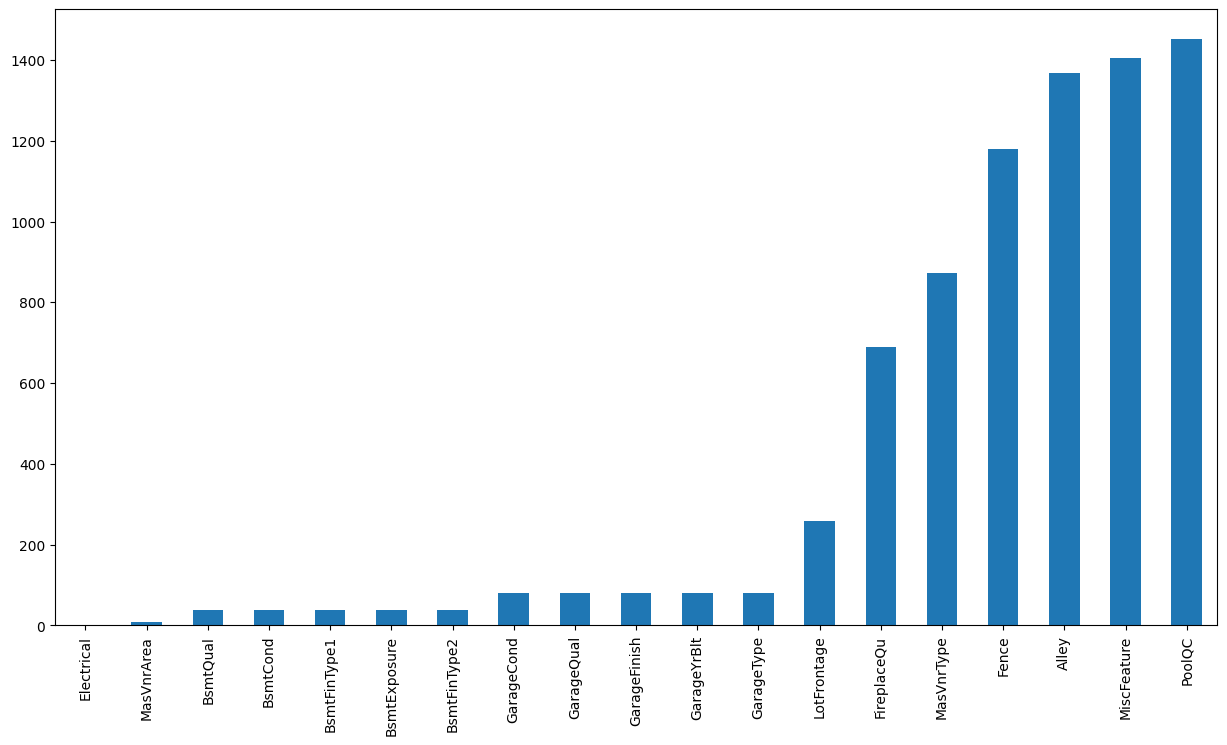

In [18]:
missing= data.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(15,8))
missing.plot.bar()

In [16]:
missing

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [20]:
sns.set(rc={'figure.figsize':(12,8)})

<Axes: xlabel='SalePrice', ylabel='Count'>

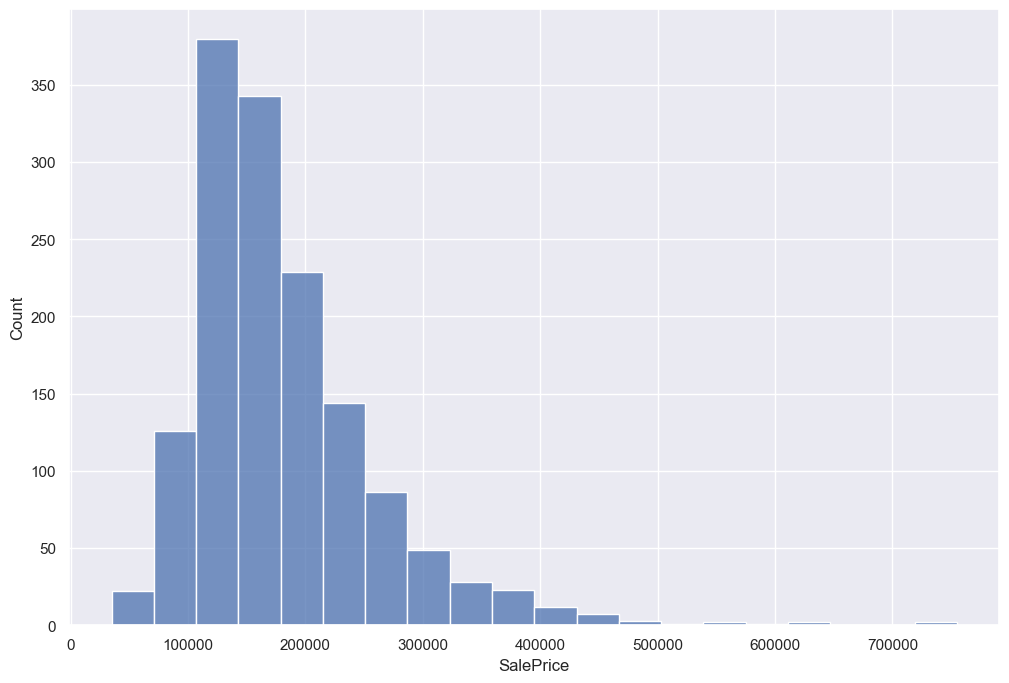

In [25]:
sns.histplot(data['SalePrice'], kde=False, bins=20)

<Axes: xlabel='SalePrice', ylabel='Density'>

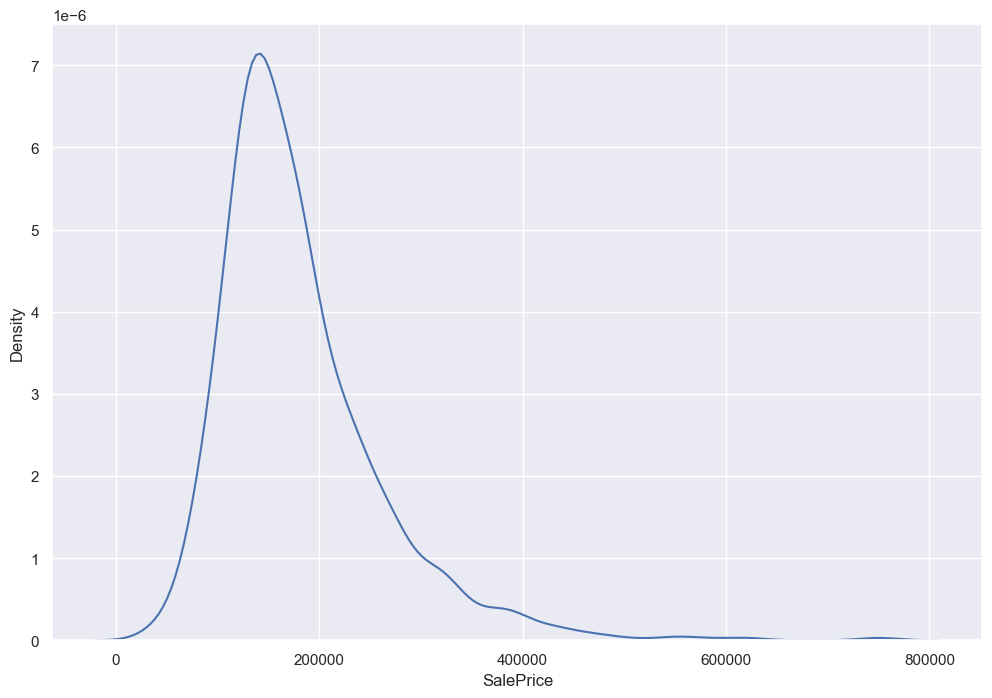

In [26]:
sns.kdeplot(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

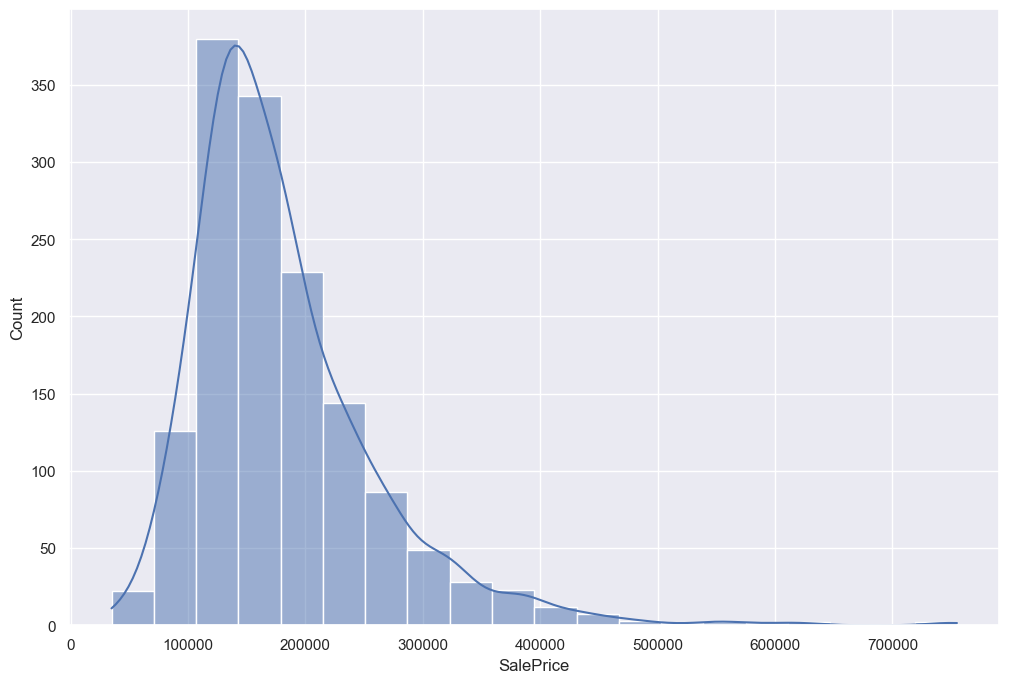

In [27]:
sns.histplot(data['SalePrice'], kde=True, bins=20)

In [28]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [29]:
numeric_features=data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
categorical_features=data.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
correlation= numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending= False), '\n')

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'Correlation on numeric features with sale price'}>

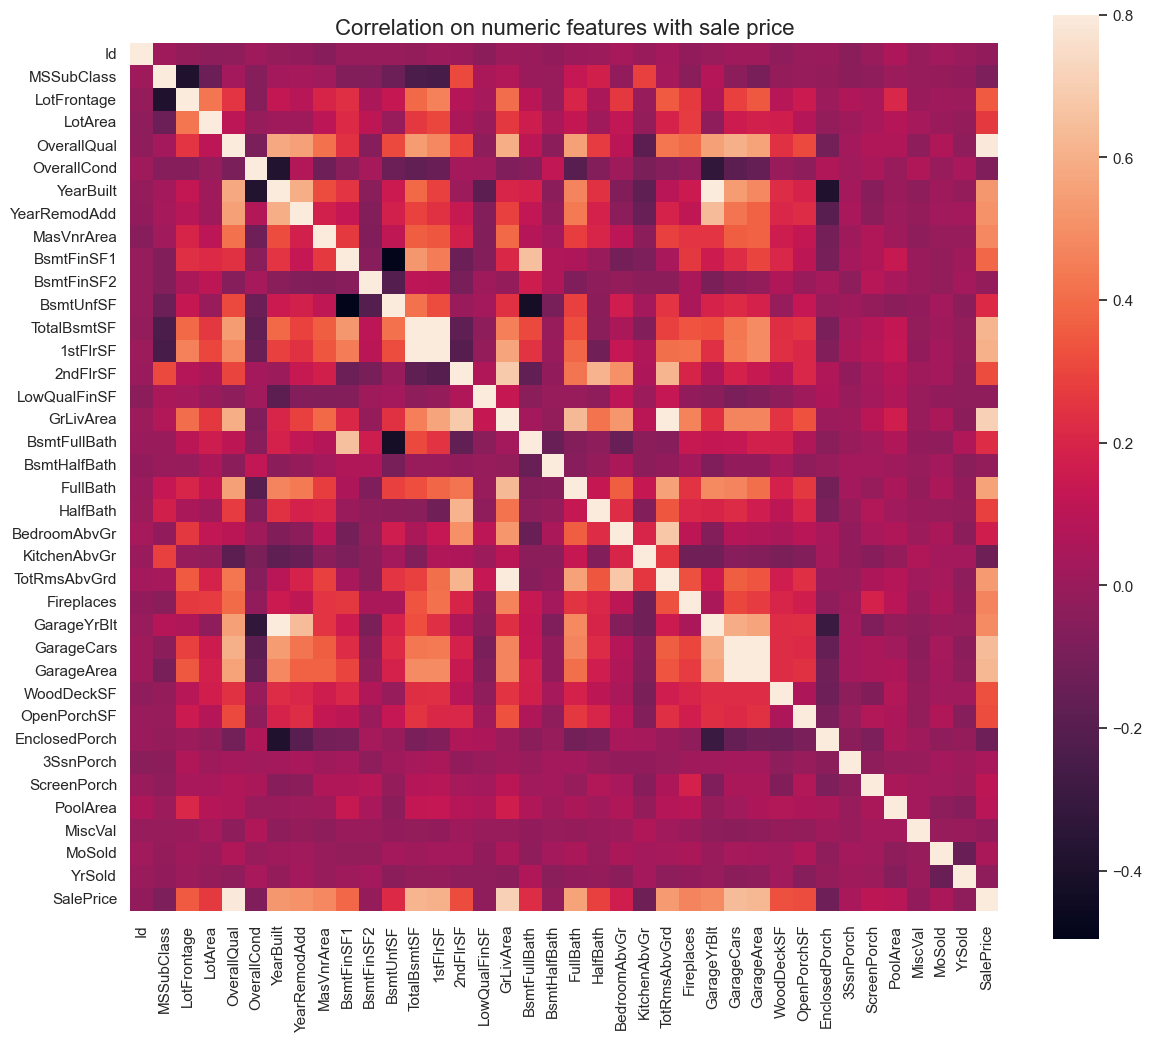

In [43]:
f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation on numeric features with sale price', y=1, size=16)
sns.heatmap(correlation, square= True, vmax=0.8)

<Axes: xlabel='GarageCars', ylabel='GarageArea'>

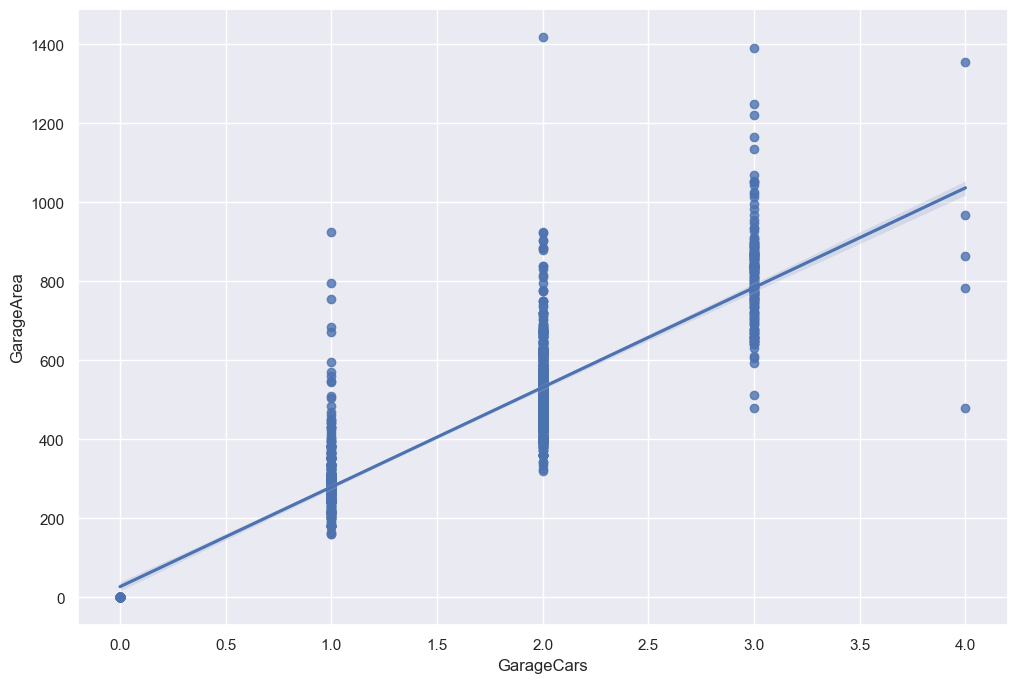

In [46]:
sns.regplot(x='GarageCars', y='GarageArea', data=data) #Give fit_reg=False if line is not needed

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='SalePrice'>

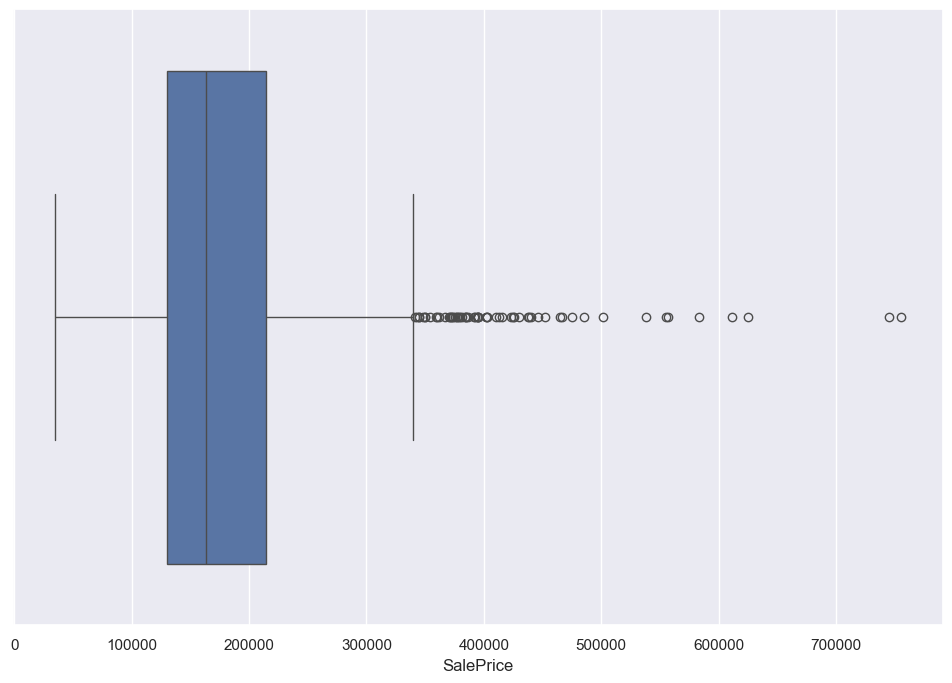

In [47]:
sns.boxplot(x=data['SalePrice'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


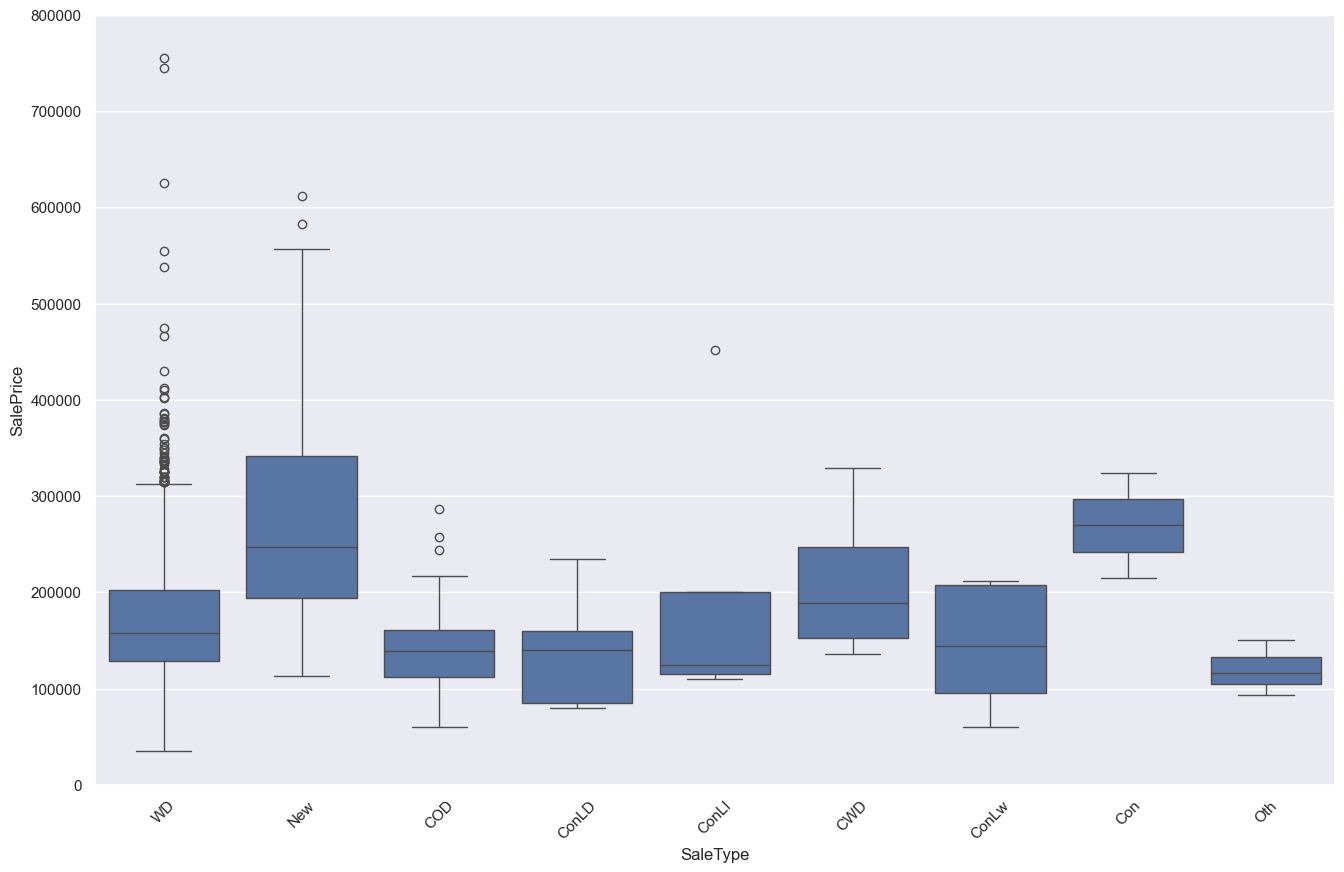

In [56]:
f, ax = plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='SaleType', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
xt= plt.xticks(rotation=45)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


(-0.5, 9.5, 0.0, 800000.0)

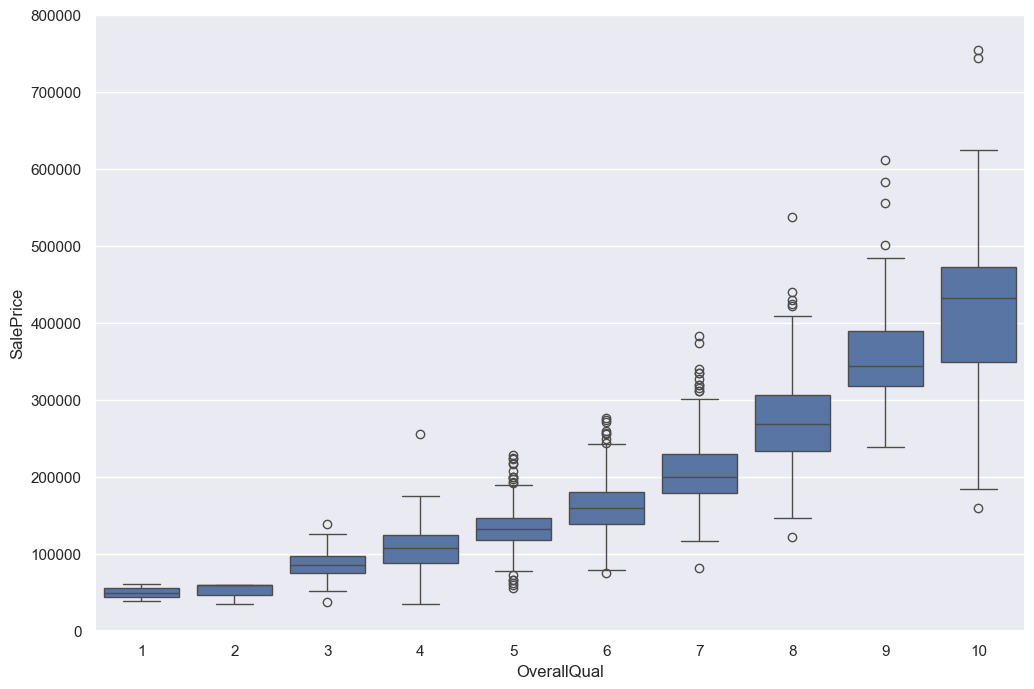

In [57]:
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
# xt= plt.xticks(rotation=45)

In [58]:
first_quartile= data['SalePrice'].quantile(0.25)
third_quartile= data['SalePrice'].quantile(0.75)

In [62]:
IQR= third_quartile-first_quartile

In [63]:
new_boundary= third_quartile+ 3*IQR

In [64]:
data.drop(data[data['SalePrice']>new_boundary].index, axis=0, inplace=True)

In [65]:
data.shape

(1448, 81)

In [72]:
cols_to_remove=['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 
                'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 
                'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr', 'FireplaceQu', 'Fence', 'Alley', 
                'MiscFeature', 'PoolQC', 'GarageCars', '1stFlrSF', 'GrLivArea', 'FullBath']

In [76]:
data['GarageQual']

0       TA
1       TA
2       TA
3       TA
4       TA
        ..
1455    TA
1456    TA
1457    TA
1458    TA
1459    TA
Name: GarageQual, Length: 1448, dtype: object

In [78]:
data.drop(cols_to_remove, axis=1)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,1999.0,RFn,460,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,1978.0,Unf,500,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,1941.0,RFn,252,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,1950.0,Unf,240,TA,TA,Y,WD,Normal,142125


In [79]:
data.drop(cols_to_remove, axis=1, inplace=True)

In [80]:
data

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,548,TA,TA,Y,WD,Normal,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,460,TA,TA,Y,WD,Normal,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,608,TA,TA,Y,WD,Normal,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,642,TA,TA,Y,WD,Abnorml,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,836,TA,TA,Y,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Attchd,1999.0,RFn,460,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Attchd,1978.0,Unf,500,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Attchd,1941.0,RFn,252,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,1950.0,Unf,240,TA,TA,Y,WD,Normal,142125


In [103]:
train= data

In [107]:
train["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1448, dtype: float64

In [109]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(train["MasVnrArea"].mean())
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(2001)

In [113]:
missing=data.isnull().sum()
missing[missing>0]

MasVnrType      870
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [112]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [116]:
c = ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "BsmtFinType1")
for col in c:
  if train[col].dtype == "object":
    train[col] = train[col].fillna("None")

In [104]:
test= pd.read_csv("test.csv")

In [106]:
test.drop(cols_to_remove, axis=1, inplace=True)

In [118]:
missing=test.isnull().sum()
missing[missing>0]

MSZoning          4
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType      894
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinType2     42
TotalBsmtSF       1
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

In [124]:
test["MasVnrArea"] = test["MasVnrArea"].fillna(test["MasVnrArea"].mean())
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(2001)
test["GarageArea"] = test["GarageArea"].fillna(test["GarageArea"].mean())
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mean())

In [125]:
for col in c:
  if test[col].dtype == "object":
    test[col] = test[col].fillna("None")

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
category_cols= data.select_dtypes(include=[object])

In [132]:
for c in category_cols:
  le = LabelEncoder()
  train[c]= le.fit_transform(train[c].values)

In [134]:
for c in category_cols:
  le = LabelEncoder()
  test[c]= le.fit_transform(test[c].values)

In [135]:
train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,1,2003.0,2,548,5,5,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,1,1976.0,2,460,5,5,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,1,2001.0,2,608,5,5,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,5,1998.0,3,642,5,5,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,1,2000.0,2,836,5,5,2,8,4,250000


In [136]:
X_train = train.drop("SalePrice", axis=1)
Y_train = train["SalePrice"]

In [139]:
X_test=test

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
X_train

array([[-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494, -1.38473488, ...,  0.29104415,
         0.31131376,  0.21131424],
       ...,
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424]])

In [142]:
X_test

array([[-1.62221708,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494, -1.38473488, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494, -1.38473488, ...,  0.29104415,
         0.31131376,  0.21131424],
       ...,
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376, -3.43134067],
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424],
       [-0.04466817,  0.06450494,  0.74683433, ...,  0.29104415,
         0.31131376,  0.21131424]])

In [143]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
regressor.score(X_train, Y_train)
regressor = round(regressor.score(X_train, Y_train) * 100, 2)
regressor

97.91